**Usual rules apply**

In [1]:
# Do not modify or delete this cell
# Do execute it
import numpy as np
import matplotlib.pyplot as plt

**The Metropolis-Hastings (MH) Algorithm**

The MH algorithm is an important tool for sampling a discrete distribution. To motivate its use, we'll use the generation of self-avoiding random paths as an example.

**Self-Avoiding Random Paths** 

Define paths of length $N$ in $\mathbb{R}^2$ starting at the origin to be of the form

$$
p = (p^{(0)},p^{(1)},\ldots,p^{(N)}),
$$
where 
$$
p^{(0)}= (0,0),
$$
$$
p^{(1)}=\delta^{(0)}
$$
$$
p^{(2)} = \delta^{(0)}+\delta^{(1)}
$$
$$
p^{(3)} = \delta^{(0)}+\delta^{(1)}+\delta^{(2)} 
$$
$$
\vdots
$$
$$
p^{(N)} = \delta^{(0)}+\cdots+\delta^{(N-1)})
$$

and where each $\delta^{(i)}$ is of the form $(-1,0),(1,0),(0,-1)$ or $(0,1).$

**Example:**

If $N=25$ and the sequence $\delta^{(i)},i=1,\ldots,25$ to be as in the following cell.

In [2]:
delta=[(1, 0),
 (0, 1),
 (1, 0),
 (0, 1),
 (1, 0),
 (0, -1),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (0, 1),
 (1, 0),
 (0, 1),
 (0, 1),
 (1, 0),
 (0, -1),
 (0, -1),
 (1, 0),
 (1, 0),
 (0, 1),
 (-1, 0),
 (0, 1),
 (0, 1),
 (1, 0),
 (1, 0)]

Here we compute the path from the list of $\delta_i$.

In [9]:
dx=[x[0] for x in delta]
dy=[x[1] for x in delta]
px=np.cumsum(dx)
py=np.cumsum(dy)
px=np.insert(px,0,0)
py=np.insert(py,0,0)
print(px)
print(py)

[ 0  1  1  2  2  3  3  4  5  6  7  7  8  8  8  9  9  9 10 11 11 10 10 10
 11 12]
[0 0 1 1 2 2 1 1 1 1 1 2 2 3 4 4 3 2 2 2 3 3 4 5 5 5]


And plot the path in the following:

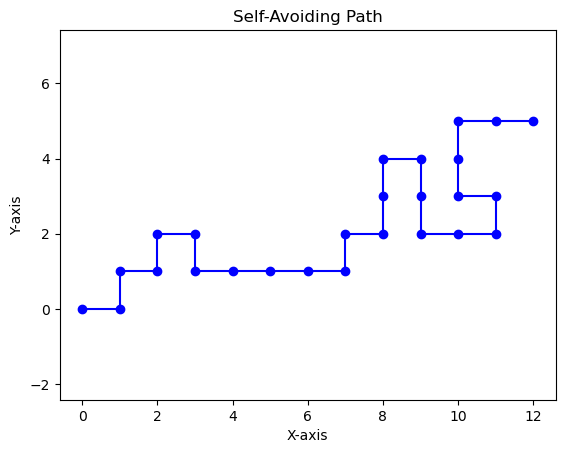

In [8]:
plt.plot(px, py, marker='o', linestyle='-', color='b')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Self-Avoiding Path')
plt.axis('equal')
plt.show()

**Distribution for Self-Avoiding Path of Length N**

Now we can consider *random* self-avoiding paths. How can we specify the distribution of such an object? One possibility is to  require that all possible choices of paths of length $N$ are equally likely.

**Acceptance-Rejection Revisited**

Not all of the possible $4^N$ choices lead to self-avoiding paths, but each of those choices defines a path and we can sample uniformly from all $4^N$ paths of them until we get one that is a **self-avoiding path.** 

To sample uniformly from the set of all $4^N$ paths, we can choose the $\delta^{(i)}$ independently with each $\delta^{(i)}$ taking one of the four possible values (-1,0), (1,0), (0,-1), and (0,1) equally likely.

> Repeat

> > Sample uniformly from all choices of $\delta^{(i)},i=1,\ldots,N$

> > Compute path x and y coordinates

> Until 

> > Self-avoidance condition holds for path

> Return path

Let's explore the efficiency of this method. First we need a helper function.

**Problem 1 (30 points)** 

Write a function called **CheckSelfAvoiding** that takes as input

- a 2d array **D** of **ints** with 2 columns and N rows (N is unspecified) where each row is of one of four possible values  [-1,0], [1,0], [0,-1] and [0,1], i.e. the rows define a sequence of N $\delta$ values for a path starting at [0,0]. (**I am going to refer to such a matrix as a $\delta$-array.**)

and which calculates returns as output 

- a Boolean **SelfAvoiding** which takes the value True if the path is self-avoiding and False otherwise.

Try to make your function run as efficiently as possible.

Use the following code cell for your function.

**Note: This function is important for everything that follows, so make sure you get it right.**

In [77]:
# Code cell for Problem 1 - do not modify or delete this line
def CheckSelfAvoiding(D):
    dx=[x[0] for x in D]
    dy=[x[1] for x in D]
    px=np.cumsum(dx)
    py=np.cumsum(dy)
    px=np.insert(px,0,0)
    py=np.insert(py,0,0)
    P=np.vstack((px, py)).T
    P_unique=np.unique(P, axis=0)
    P_len=len(P)
    return len(P)==len(P_unique)

In [78]:
# Test cell 1 for Problem 1 - do not delete or modify this cell
# Do excecute it
np.random.seed(673) 
R=np.array([[-1,0],[1,0],[0,-1],[0,1]])
I=np.random.choice(range(4),size=25)
D=R[I]
res=CheckSelfAvoiding(D)
print(res)

False


In [79]:
# Test cell 1 for Problem 1 - do not delete or modify this cell
# Do excecute it
np.random.seed(5812)
R=np.array([[-1,0],[1,0],[0,-1],[0,1]])
I=np.random.choice(range(4),size=25)
D=R[I]
res=CheckSelfAvoiding(D)
print(res)    

True


In [80]:
# Test cell 2 for Problem 1 - do not delete or modify this cell
# Do excecute it
np.random.seed(1141341)
IndicesOfSelfAvoiding=[]
for j in range(100000):
    R=np.array([[-1,0],[1,0],[0,-1],[0,1]])
    I=np.random.choice(range(4),size=25)
    D=R[I]
    res=CheckSelfAvoiding(D)
    if res:
        IndicesOfSelfAvoiding.append(j)
print(IndicesOfSelfAvoiding)

[3099, 8214, 23750, 26367, 42485, 86138, 91193, 99716]


**Function to plot the path associated with a given $\delta$-array**

In the following cell, a function is defined that will be used below.
Do not modify this function.

In [81]:
# Function cell for Problem 1 - do not delete or modify this cell
# Do execute it.
def PlotSAP(D):
    dx=D[:,0]
    dy=D[:,1]
    px=np.cumsum(dx)
    py=np.cumsum(dy)
    px=np.insert(px,0,0)
    py=np.insert(py,0,0)
    plt.plot(px, py, marker='o', linestyle='-', color='b')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Self-Avoiding Path')
    plt.axis('equal')
    plt.show()

Number of trials to produce self-avoiding path = 58654


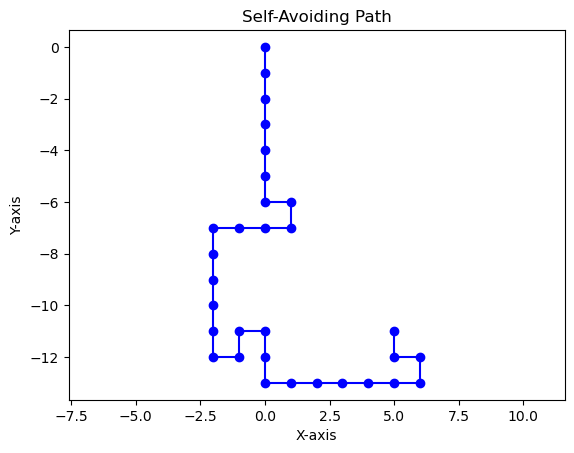

In [82]:
# Test cell 3 for Problem 1 - do not delete or modify this cell
# Do execute it
np.random.seed(77811411)
IndicesOfSelfAvoiding=[]
ctr=0
while True:
    R=np.array([[-1,0],[1,0],[0,-1],[0,1]])
    I=np.random.choice(range(4),size=30)
    D=R[I]
    res=CheckSelfAvoiding(D)
    if res:
        break
    ctr+=1
print("Number of trials to produce self-avoiding path = "+str(ctr))
PlotSAP(D)

**Problem 2 (10 points)**

Let $R$ denote the Euclidean distance from the origin of the endpoint of a random self-avoiding path of length 10. Here, if the path has coordinates $(px[i],py[i]),~i=0,\ldots,10$ then
$$
R = \sqrt{px[10]^2+py[10]^2}
$$
Use Monte-Carlo simulation and the acceptance-rejection method just utilized to estimate $\mu = E[R]$ the expected value of $R$ based on a sample of 1,000 randomly generated self-avoiding paths and get an approximate 95% confidence interval for $\mu.$

In your code cell, assign to

- **muhat** your estimate of $\mu$ rounded to 2 decimal places
- **sigmahat** your estimate of the standard deviation of $R$ rounded to 2 decimal places
- **muL** and **muU** lower and upper 95% confidence bounds, rounded to 2 decimal places

In [102]:
# Code cell for Problem 2 - do not modify or delete this line
N=1000
R=np.array([[-1,0],[1,0],[0,-1],[0,1]])
Euc_dist=[]
for i in range(N):
    while True:
        I=np.random.choice(range(4),size=10)
        D=R[I]
        res=CheckSelfAvoiding(D)
        if res:
            dx=D[:,0]
            dy=D[:,1]
            px=dx.sum()
            py=dy.sum()
            Euc_dist.append(np.sqrt(px**2+py**2))
            break
muhat=round(np.mean(Euc_dist),2)
sigmahat=round(np.std(Euc_dist),2)
muL=round(muhat-1.96*sigmahat/np.sqrt(N),2)
muU=round(muhat+1.96*sigmahat/np.sqrt(N),2)

In [101]:
# Print cell for Problem 2 - do not modify or delete this cell
# Do execute it
print(muhat)
print(sigmahat)
print(muL)
print(muU)

4.81
1.63
4.71
4.91


Lots of trials are needed to generate a self-avoiding path using the acceptance-rejection method. We need another method.

**The Metropolis-Hastings (MH) Algorithm**

The idea of the MH algorithm is to create a Markov chain whose stationary distribution is the one we want to sample, and then in order to sample the disribution we run the chain for several steps starting from some particular state.

To explain how this works, let the possible values of our states be denote by $S$ and assume this state space has $K$ elements. Also, assume $\pi$ is a row vector giving a probability distribution on this state spaces so $\pi$ is of length $K.$

The goal is the define a Markov chain whose stationary distribution is $\pi.$

Suppose we can define a transition matrix $Q = ( q_{ij})$ for a Markov chain moving around in $S,$ with the property that

$$
\pi_i q_{ij} = \pi_j q_{ji}
$$

for all possible pairs of states $i,j \in S.$ 

**Intepretation**

Assuming we are in position $i$ at time $t$ with probability $\pi_i$ the left-hand side of this expression gives 

$$
P[X_t = i] P[X_{t+1}=j \vert X_t = i] = P[X_{t+1}=j]
$$

the probability of being in state $j$ at time $t+1.$ On the other hand, the right-hand side gives the probability of being in state $i$ at time $t+1$ assuming the chain starts in state $j$ with probability $\pi_j.$

The condition

$$
\pi_i q_{ij} = \pi_j q_{ji}
$$

for all states $i$ and $j$ is referred to as the **detailed balance condition (DBC).**

**Consequences of the DBC**

Assuming the DBC holds, we can sum both sides of the equation over all possible states $i\in S$ 

$$
\sum_i \pi_i q_{ij} = \sum_i \pi_j q_{ji} = \pi_j \sum_i q_{ji} = \pi_j
$$

since $Q$ is a transition matrix (row sums are 1).

In other words, if the DBC holds then

$$
\pi Q = \pi.
$$

i.e. $\pi$ is the stationary distribution of the Markov chain with transition matrix $Q.$

So given $\pi$ if we can find a $Q$ for which the DBC holds, then this gives us a Markov chain we can run for a long time to generate a sample from $\pi.$

**Creating a transition matrix Q satisfying the DBC**

To create a desired transition matrix, we proceed as follows. 

They key idea is to think of the states in a graph where each state is only connected to a relatively small collection of other states, then our Markov chain walks around in that graph, always moving from state to neighboring state.

(It helps to recall the problem of generating a random permutation by making one transposition at a time. If our permutation is of 0,1,...,N-1 then a given permutation only has ${N \choose 2}$ neighbors.)

For each given state $i$ we determine the set of states $j$ (not including state $i$ itself) that we can get to starting from $i$ in a single step. These are the so-called **neighbors** of state $i.$ Let ${\cal N}_i$ denote the states that can be reached in one step starting from state $i$ and let $N_i = \vert {\cal N}_i \vert$ denote the number of such states.

Assuming we are in state $i$ at some time $t,$ we pick a random state $j$ of ${\cal N}_i$ with all being equally likely, **we refer to this as nomination of a state to jump to** and then conditionally given that $j$ is selected, we move to that state with probability

$$
\min \left\{ 1, \frac{\pi_j N_i}{\pi_i N_j} \right\} 
$$

(and otherwise we remain in state $i$).
So assuming we are currently in state $i$ the probability we move from state $i$ to state $j$ becomes

$$
q_{ij} = \frac{1}{N_i} \min \left\{ 1, \frac{\pi_j N_i}{\pi_i N_j} \right\}.
$$

for all $j \in {\cal N}_i.$

And we check the detailed balance condition

$$
\pi_i q_{ij} = \frac{\pi_i}{N_i} \min \left\{ 1, \frac{\pi_j N_i}{\pi_i N_j} \right\} = \min \left\{ \frac{\pi_i}{N_i} ,\frac{\pi_j}{N_j} \right\}
$$

which is symmetric in $i$ and $j,$ and we see that this is the same as

$$
\pi_j q_{ji}.
$$

We conclude that this defines a transition matrix $Q$ for a Markov chain with stationary distribution $\pi.$

**Note:** The probability of remaining in state $i$ is not specified directly here, but it could be determined since we know the probability of moving to every possible neighboring state.


**Note (needed for Problem 8)**

This is not the only $Q$ that works!!! We could also **nominate** $j \in {\cal N}_i$ with probability proportional to $\pi_j,$ i.e. with probability equal to

$$
\frac{\pi_j}{\sum_{u \in {\cal N}_i}\pi_u}
$$

and then move to $j$ with probability

$$
\min \left\{ 1, \frac{\pi_i}{\pi_j} 
\frac{\sum_{u \in {\cal N}_i}\pi_u}{\sum_{v \in {\cal N}_j}\pi_v}\right\}
$$

and remain in state $i$ otherwise.

**Transition Matrix Can be Specified Without Normalization of the Probability Weights**

Importantly, in order to run either of the versions of the MH algorithms just described, we only need to know the ratio of probabilities $\pi_i/\pi_j$ for states $i$ and $j.$

This means we can specify a stationary distribution by giving a weight to each state, but we don't have to normalize the weights by dividing by their sum since that normalizing constant will cancel in the ratio $\pi_i/\pi_j.$ 

This is importnane because normalization would require possibly having to enumerate **all** states, a potentially unwieldy task. 

**Self-Avoiding Paths of length N**

Now we focus on the situation in which our state space consists of all self-avoiding paths of length $N.$ 
Since each path is defined in terms of a sequence 
$\delta=(\delta^{(0)},\ldots,\delta^{(N-1)})$ we will now denote the state (self-avoiding path) associated with $\delta$ by $p_\delta.$ 

Assume that we have a computable probability distribution on the self-avoiding paths, i.e. we can calculate a quantity $\pi_{p_\delta}$ for given $\delta$ (**as pointed out above, these do not need to sum to 1 - all that is needed is relative probability weights)**).

Given a self-avoiding path $p_\delta$ we need to defined a set of possible self-avoiding paths ${\cal N}_{p_\delta}$ we can move to from this one. We will call these the **neighboring self-avoiding paths** of $p_\delta.$

A natural thing to try is to consider all paths $p_{\delta'}$ based on $\delta'$ that where $\delta'$ 

- differs from $\delta$ in exactly one of the $N$ possible positions, and
- where $p_{\delta'}$ defines a self-avoiding path.

So for the Markov chain obtained from the MH algorithm we move to our next state (or stay where we are) by the following steps:

**Step 1.** Make a list ${\cal N}_{p_\delta}$ of all $\delta'$ that differ from $\delta$ in exactly one position (there are $3N$ possibilities) and that define a self-avoiding path.

**Step 2.** Determine $N_{p_\delta} = \vert {\cal N}_{p_\delta}\vert$ the number of paths that can be moved to starting from $p_{\delta}.$

**Step 3.** Pick a random element $\delta' \in {\cal N}_{p_\delta}$ with all equally likely.


**Step 4.** Determine $\pi_{p_{\delta}}$ and $\pi_{p_{\delta'}}$ and $N_{p_{\delta'}}.$ 

**Step 5.** Calculate the conditional probability of moving to $p_{\delta'}$ 
$$
\min \left\{ 1, 
\frac{\pi_{p_{\delta'}}N_{p_\delta}}
{\pi_{p_{\delta}}N_{p_{\delta'}}}
\right\}
$$
given that we selected this new path $p_{\delta'}$ and move to $p_{\delta'}$ with this conditional probability.


**Problem 3 (30 points)**

We need a function for Step 1. Write a function called **DSubs** that takes as input 

- **D** a $\delta$ -array (see Problem 1 for the definition) that produces a self-avoiding path 

and which produces as output

- a list of all of the $\delta$ arrays that 

    - can be obtained from **D** by modifying exactly one of its rows
    - and defines a self-avoiding path

Your function can call your previous CheckSelfAvoiding function from Problem 1 but otherwise it should be self-contained. Any functions other than CheckSelfAvoiding or variables needed should be defined in the body of your function.

Use the following cell for your code.

**Warning: This function is important for all that follows so make sure you get it right.**

In [ ]:
# Code cell for Problem 3 - do not delete or modifiy this line
def DSubs(D):
    ...

In [ ]:
# Test cell 3 for Problem 1 - do not delete or modify this cell
# Do excecute it
np.random.seed(77811411)
IndicesOfSelfAvoiding=[]
ctr=0
while True:
    R=np.array([[-1,0],[1,0],[0,-1],[0,1]])
    I=np.random.choice(range(4),size=30)
    D=R[I]
    res=CheckSelfAvoiding(D)
    if res:
        break
    ctr+=1
print("Number of trials to produce self-avoiding path = "+str(ctr))
PlotSAP(D)

**In the following cells we plot some neighbors of the SAP we generate above**

In [ ]:
ListOfNeighbors=DSubs(D)
print(len(ListOfNeighbors))

In [ ]:
PlotSAP(ListOfNeighbors[6])

In [ ]:
PlotSAP(ListOfNeighbors[11])

**Problem 4 (10 points)**

Write a function called **RandomSAP** that takes the following arguments:

- **N** the length of self-avoiding path to generate.
- **NSteps** number of times we call DSubs function to generate all possible neighboring states and pick a random one to possibly move to.

The function should take the chain's initial state to be the **straight** SAP with the $\delta$-array consisting of all $N$ rows equal to [1,0], and apply **NSteps** of the Metropolis-Hastings algorithm described above for the case when the desired stationary distribution is the **uniform distribution** on all SAP's of length N, and should return as output:

- **D** the delta array of the final self-avoiding path.

Use the following code cell for your code. Your function is allowed to call the DSubs function you defined in Problem 3 but should otherwise be fully self-contained.

Try to make your code as efficient as possible. In particular, it is possible to write the code so that you when you move to a new state, you can re-use the already calculated list of neighboring states of that state.

In [ ]:
# Code cell for Problem 4 - do not modify or delete this line
def RandomSAP(N,Nsteps):
    ...

In [ ]:
# Test code for Problem 4 - do not delete or modify this cell
# Do execute it.
Dnew=RandomSAP(30,1000)
PlotSAP(Dnew)

**Problem 5 (10 points)**

As in Problem 2, let $R$ denote the Euclidean distance from the end of a random SAP of length 10 with all such SAP's equally likely. Use your function in Problem 4 with 1,000 steps to generate random 100 SAP's of length 10 and use these to estimate $\mu = E[R],$ 
$\sigma = \mbox{SD}(R)$ and get an approximate 95% confidence interval for $\mu,$ using a sample of size of 1,000.

In your code cell, assign to

- **muhat5** your estimate of $\mu$ rounded to 2 decimal places
- **sigmahat5** your estimate of the standard deviation of $R$ rounded to 2 decimal places
- **muL5** and **muU5** lower and upper 95% confidence bounds, rounded to 2 decimal places

**Note:** your code might take a while to run.  I recommend putting in a print statement like in the following:

> for i in range(100):
   
> > if i+1==10*int((i+1)/10):
   
> > > print(i+1)
        
so you can get a sense of how long the code will need to run.

In [ ]:
# Code cell for Problem 5 - do not delete or modify this line


In [ ]:
# Print cell for Problem 5 - do not modify or delete this cell
# Do execute it
print(muhat5)
print(sigma5)
print(muL5)
print(muU5)

**Alternative Distributions**

In the above example, we generated approximate samples uniformly distributed among SAP's of fixed length $N.$ We can also use the MH algorithm to sample using a specified alternative distribution. Such a distribution can take the form of a function that takes as input a $\delta$-array of dimension $N \times 2$ defining a SAP, and outputs a probability weight given to that $\delta$-array. (These weights do not have to sum to one, but they do define a probability distribution if we were to sum them over all SAP's of length $N.$ As mentioned above, a convenient fact about the MH algorithm is that we do not have to determine the normalizing constant.)

Here is an example. Our weight function could *penalize* paths defined from 
$\delta = [\delta_0,\ldots,\delta_{N-1}]$ where many $\delta_i$ and $\delta_{i+1}$ are differnt by taking

$$
f(\delta) = e^{-c {\cal D}(\delta)}
$$

where ${\cal D}(\delta)$ denotes the number of times $\delta_i\neq \delta_{i+1}$ for $i=0,\ldots,N-2$ i.e.

$$
{\cal D}(\delta) = \sum_{i=0}^{N-2} I_{\delta_i \neq \delta_{i+1}}.
$$

Here $c$ is a parameter to be specified.

The following code cell provides code for such a function when the parameter $c$ is specified globally.


In [ ]:
# Code cell for probability weight - do not modify or delete this cell.
# Do execute it.
def wgt(D):
    N=D.shape[0]
    n=0
    for i in range(N-1):
        if not np.array_equal(D[i,:],D[i+1,:]):
            n+=1
    return(np.exp(-c*n))

**Problem 6 (10 points)**

Write a function call **RandomSAP2** that takes 3 arguments 

- **N** the length of self-avoiding path to generate.
- **NSteps** number of times we call DSubs function to generate all possible neighboring states and pick a random one to possibly move to.
- **pweight** a function (like wgt defined above) that takes as input a $\delta$ array and outputs a probability weight assigned to it.

As in Problem 4, the function should assume a starting **straight** SAP with the $\delta$-array with all $N$ rows equal to [1,0], and apply the Metropolis-Hastings algorithm described above for the case when the desired distribution is defined from the probabilty weight function, and should return as output:

- **D** the delta array of the final self-avoiding path.

Use the following code cell for your code. Your function is allowed to call the DSubs function you defined in Problem 3 but should otherwise be fully self-contained.

Try to make your code as efficient as possible. 

In [ ]:
# Code cell for Problem 6
def RandomSAP2(N,Nsteps,pweight):
    ...

In [ ]:
# Test code for Problem 6 - do not delete or modify this cell
# Do execute it.
c=.2
Dnew=RandomSAP2(30,100,wgt)
PlotSAP(Dnew)

**Problem 7 (10 points)**

Use your RandomSAP2 function to estimate, using Monte-Carlo simulation, estimate the expected value of $R$ for a random SAP of length 10 assuming the SAP distribution defined by the weight function above with c=.3. Use a Monte-Carlo sample size of 100 trials.

Use the following cell for your code.  In that cell, assign values to the following variables:

**muhat7** = estimate of the expected **mu = E[R]** under the assumed SAP distribution

**sigma7** = estimate of the standard deviation of **STD[R]** under the assumed SAP distribution

**muL7** = 95% lower confidence bound for **mu**

**muU7** = 95% upper confidence bound for **mu**

In [ ]:
# Code cell for Problem 7 - do not delete or modify this line


In [ ]:
# Print cell for Problem 7 - do not remove or modify this cell
# Do execute it
print(muhat7)
print(sigma7)
print(muL7)
print(muU7)

**Problem 8 (10 points)**

Write a function call **RandomSAP3** that takes 3 arguments 

- **N** the length of self-avoiding path to generate.
- **NSteps** number of times we call DSubs function to generate all possible neighboring states and pick a random one to possibly move to.
- **pweight** a function (like wgt defined above) that takes as input a $\delta$ array and outputs a probability weight assigned to it.

and which implements the **alternative formulation of the MH algorithm** described above (see **Note (needed for Problem 8)**).

As in Problem 6, the function should assume a starting **straight** SAP with the $\delta$-array with all $N$ rows equal to [1,0], and apply the alternative formulation of the Metropolis-Hastings algorithm described above for the case when the desired distribution is defined from the probabilty weight function, and should return as output:

- **D** the delta array of the final self-avoiding path.

Use the following code cell for your code. Your function is allowed to call the DSubs function you defined in Problem 3 but should otherwise be fully self-contained.

Try to make your code as efficient as possible. 

In [ ]:
# Code cell for Problem 8
def RandomSAP3(N,Nsteps,pweight):
    ...

**Problem 9 (10 points)**

Use your RandomSAP3 function to estimate, using Monte-Carlo simulation, estimate the expected value of $R$ for a random SAP of length 10 assuming the SAP distribution defined by the weight function above with c=.3.


Use a Monte-Carlo sample size of 100 trials.

Use the following cell for your code.  In that cell, assign values to the following variables:

**muhat9** = estimate of the expected **mu = E[R]** under the assumed SAP distribution

**sigma9** = estimate of the standard deviation of **STD[R]** under the assumed SAP distribution

**muL9** = 95% lower confidence bound for **mu**

**muU9** = 95% upper confidence bound for **mu**

In [ ]:
# Code cell for Problem 9 - do not delete or modify this line


In [ ]:
# Print cell for Problem 9 - do not remove or modify this cell
# Do execute it
print(muhat9)
print(sigma9)
print(muL9)
print(muU9)

**Make sure that**

- all cells run without error
- you save your notebook before submitting it